# Análise preliminar

Aqui procuramos, a partir dos dados já tratados disponibilizados pelos autores, reproduzir a análise exploratória apresentada

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# checando tipo de encoding
# !file -I ../data/dados_brutos/sinistros/sinistros_2015-2021.csv

# checando erro na linha 928, vê-se que o delimitador é ';'
# with open("../data/dados_brutos/sinistros/sinistros_2015-2021.csv", encoding="iso-8859-1") as f:
#     for i, line in enumerate(f, 1):
#         if i == 928:
#             print(line)
#             break

df_sinistros_1521 = pd.read_csv("../data/data-unzip/dados_brutos/sinistros/sinistros_2015-2021.csv", encoding="iso-8859-1", sep=';')
df_sinistros_1521.head()

,id_sinistro,tipo_registro,data_sinistro,ano_sinistro,mes_sinistro,dia_sinistro,ano_mes_sinistro,hora_sinistro,logradouro,numero_logradouro,...,tp_sinistro_colisao_traseira,tp_sinistro_colisao_lateral,tp_sinistro_colisao_transversal,tp_sinistro_colisao_outros,tp_sinistro_choque,tp_sinistro_capotamento,tp_sinistro_engavetamento,tp_sinistro_tombamento,tp_sinistro_outros,tp_sinistro_nao_disponivel
0,2501575,SINISTRO FATAL,21/12/2014,2014,12,21,2014/12,20:00,RUA MANOEL MACHADO PEREIRA,905.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2456933,SINISTRO FATAL,23/12/2014,2014,12,23,2014/12,NaN,AVENIDA VINTE E TRES,1000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S
2,2463759,SINISTRO FATAL,26/12/2014,2014,12,26,2014/12,06:52,AVENIDA REBOUCAS,300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2487781,SINISTRO FATAL,28/12/2014,2014,12,28,2014/12,14:30,ESTRADA EGÍLIO VITORELLO,589.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2489730,SINISTRO FATAL,28/12/2014,2014,12,28,2014/12,NaN,AVENIDA SAO PAULO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S


In [5]:
df_sinistros_2225 = pd.read_csv("../data/data-unzip/dados_brutos/sinistros/sinistros_2022-2025.csv", encoding="iso-8859-1", sep=';')

df_sinistros_2225['tp_veiculo_nao_disponivel'].head()
df_sinistros_2225.columns

Index(['id_sinistro', 'tipo_registro', 'data_sinistro', 'ano_sinistro',
       'mes_sinistro', 'dia_sinistro', 'ano_mes_sinistro', 'hora_sinistro',
       'logradouro', 'numero_logradouro', 'tipo_via', 'latitude', 'longitude',
       'municipio', 'regiao_administrativa', 'tp_veiculo_bicicleta',
       'tp_veiculo_caminhao', 'tp_veiculo_motocicleta',
       'tp_veiculo_nao_disponivel', 'tp_veiculo_onibus', 'tp_veiculo_outros',
       'tp_veiculo_automovel', 'gravidade_nao_disponivel', 'gravidade_leve',
       'gravidade_fatal', 'gravidade_ileso', 'gravidade_grave',
       'administracao', 'conservacao', 'jurisdicao', 'tipo_acidente_primario',
       'tp_sinistro_atropelamento', 'tp_sinistro_colisao_frontal',
       'tp_sinistro_colisao_traseira', 'tp_sinistro_colisao_lateral',
       'tp_sinistro_colisao_transversal', 'tp_sinistro_colisao_outros',
       'tp_sinistro_choque', 'tp_sinistro_capotamento',
       'tp_sinistro_engavetamento', 'tp_sinistro_tombamento',
       'tp_sinistro_out

In [31]:
df_sinistros = pd.concat([df_sinistros_1521, df_sinistros_2225], ignore_index=True)
df_sinistros.head()
df_sinistros.municipio

0                     CAMPINAS
1                     BARRETOS
2                    SAO PAULO
3                  CARAPICUIBA
4                 PRAIA GRANDE
                  ...         
1208092    SAO JOSE DOS CAMPOS
1208093              SAO PAULO
1208094              SAO PAULO
1208095                VINHEDO
1208096          CARAGUATATUBA
Name: municipio, Length: 1208097, dtype: object

In [35]:
# criar coluna de tipo de transporte

def tipo_transporte(row):
    if row['tp_veiculo_motocicleta'] == 1:
        return 'Motocicleta'
    elif row['tp_veiculo_nao_disponivel'] == 1:
        return 'Não disponível'
    else:
        return 'Outros'
    
df_sinistros['tipo_de_transporte'] = df_sinistros.apply(tipo_transporte, axis=1)

In [36]:
df_sinistros['tipo_de_transporte'].unique()

array(['Não disponível', 'Outros', 'Motocicleta'], dtype=object)

In [37]:
df_sinistros.shape[0] == df_sinistros_1521.shape[0] + df_sinistros_2225.shape[0]

True

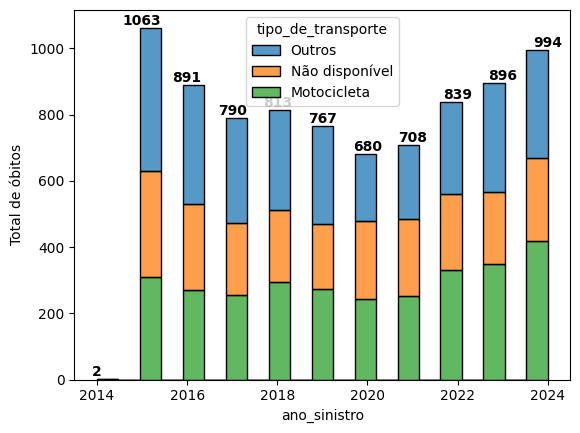

In [44]:
df_obitos_msp = df_sinistros.query("tipo_registro == 'SINISTRO FATAL' and municipio == 'SAO PAULO' and ano_sinistro < 2025")

# Plot
ax = sns.histplot(data=df_obitos_msp, x='ano_sinistro', hue='tipo_de_transporte', multiple='stack')

# Total por ano
total_ob = df_obitos_msp.groupby('ano_sinistro').size()

# Add text above each year
for year, total in total_ob.items():
    ax.text(year, total, f'{total}', ha="center", va="bottom", fontweight='bold')

plt.ylabel('Total de óbitos')
plt.show()

In [39]:
df_sinistros.query("tipo_registro == 'SINISTRO FATAL' and ano_sinistro < 2025").shape

(51183, 44)

In [40]:
df_sinistros.query("tipo_registro == 'SINISTRO FATAL' and municipio == 'SAO PAULO' and ano_sinistro < 2025")['tipo_de_transporte']

2                  Outros
5          Não disponível
12            Motocicleta
13                 Outros
17            Motocicleta
                ...      
1133389       Motocicleta
1133669    Não disponível
1134027       Motocicleta
1134028    Não disponível
1134032       Motocicleta
Name: tipo_de_transporte, Length: 8443, dtype: object

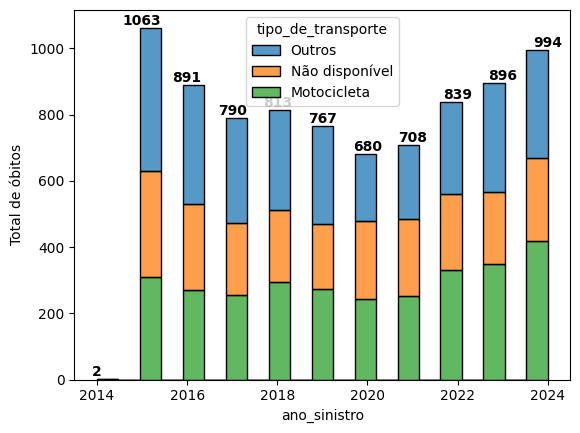

In [43]:
df_obitos_msp = df_sinistros.query("tipo_registro == 'SINISTRO FATAL' and municipio == 'SAO PAULO' and ano_sinistro < 2025")

# Create plot
ax = sns.histplot(data=df_obitos_msp, x='ano_sinistro', hue='tipo_de_transporte', multiple='stack')

# Get totals per year
totals = df_obitos_msp.groupby('ano_sinistro').size()

# Add text above each year
for year, total in totals.items():
    ax.text(year, total, f'{total}', ha="center", va="bottom", fontweight='bold')

plt.ylabel('Total de óbitos')
plt.show()

In [63]:
df_pessoas_1521 = pd.read_csv("../data/data-unzip/dados_brutos/pessoas/pessoas_2015-2021.csv", encoding="iso-8859-1", sep=';')
df_pessoas_2225 = pd.read_csv("../data/data-unzip/dados_brutos/pessoas/pessoas_2022-2025.csv", encoding="iso-8859-1", sep=';')
df_pessoas = pd.concat([df_pessoas_1521, df_pessoas_2225], ignore_index=True)
df_merge = pd.merge(df_pessoas, df_sinistros[['id_sinistro', 'tipo_de_transporte']], on='id_sinistro', how='left')
df_merge

,id_sinistro,municipio,tipo_via,tipo_veiculo_vitima,sexo,idade,data_obito,gravidade_lesao,tipo_de vítima,faixa_etaria_demografica,...,data_sinistro,ano_sinistro,mes_sinistro,dia_sinistro,ano_mes_sinistro,ano_obito,mes_obito,dia_obito,ano_mes_obito,tipo_de_transporte
0,2489730,PRAIA GRANDE,VIAS MUNICIPAIS,NAO DISPONIVEL,MASCULINO,30.0,01/01/2015,FATAL,NAO DISPONIVEL,30 a 34,...,28/12/2014,2014,12,28,2014/12,2015.0,1.0,1.0,2015/01,Não disponível
1,2483966,SANTO ANDRE,VIAS MUNICIPAIS,NAO DISPONIVEL,MASCULINO,38.0,01/01/2015,FATAL,NAO DISPONIVEL,35 a 39,...,01/01/2015,2015,1,1,2015/01,2015.0,1.0,1.0,2015/01,Não disponível
2,2470532,FERNANDOPOLIS,VIAS MUNICIPAIS,NAO DISPONIVEL,MASCULINO,26.0,04/01/2015,FATAL,NAO DISPONIVEL,25 a 29,...,04/01/2015,2015,1,4,2015/01,2015.0,1.0,4.0,2015/01,Não disponível
3,2481481,SAO PAULO,VIAS MUNICIPAIS,PEDESTRE,FEMININO,90.0,06/01/2015,FATAL,PEDESTRE,90 e +,...,06/01/2015,2015,1,6,2015/01,2015.0,1.0,6.0,2015/01,Outros
4,2506869,MOGI GUACU,VIAS MUNICIPAIS,NAO DISPONIVEL,NAO DISPONIVEL,44.0,09/01/2015,FATAL,NAO DISPONIVEL,40 a 44,...,09/01/2015,2015,1,9,2015/01,2015.0,1.0,9.0,2015/01,Não disponível
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653222,2608847,ITAPIRA,VIAS MUNICIPAIS,NaN,MASCULINO,31.0,NaN,NAO DISPONIVEL,CONDUTOR,30 a 34,...,31/05/2025,2025,5,31,2025/05,NaN,NaN,NaN,NaN,Outros
1653223,2596088,SAO PAULO,VIAS MUNICIPAIS,NaN,FEMININO,40.0,NaN,NAO DISPONIVEL,CONDUTOR,40 a 44,...,31/05/2025,2025,5,31,2025/05,NaN,NaN,NaN,NaN,Outros
1653224,2596982,SAO PAULO,VIAS MUNICIPAIS,NaN,FEMININO,42.0,NaN,LEVE,NAO DISPONIVEL,40 a 44,...,31/05/2025,2025,5,31,2025/05,NaN,NaN,NaN,NaN,Motocicleta
1653225,2602909,TEODORO SAMPAIO,VIAS MUNICIPAIS,NaN,FEMININO,53.0,NaN,LEVE,CONDUTOR,50 a 54,...,31/05/2025,2025,5,31,2025/05,NaN,NaN,NaN,NaN,Outros


In [70]:
df_pessoas.columns
df_pessoas['tipo_veiculo_vitima'].unique()

array(['NAO DISPONIVEL', 'PEDESTRE', 'MOTOCICLETA', 'ONIBUS', 'AUTOMOVEL',
       nan, 'CAMINHAO', 'BICICLETA', 'OUTROS', 'Motocicleta', 'Pedestre',
       'Bicicleta', 'Outros'], dtype=object)

In [30]:
totals

ano_sinistro
2022    5420
2023    5485
2024    6122
dtype: int64

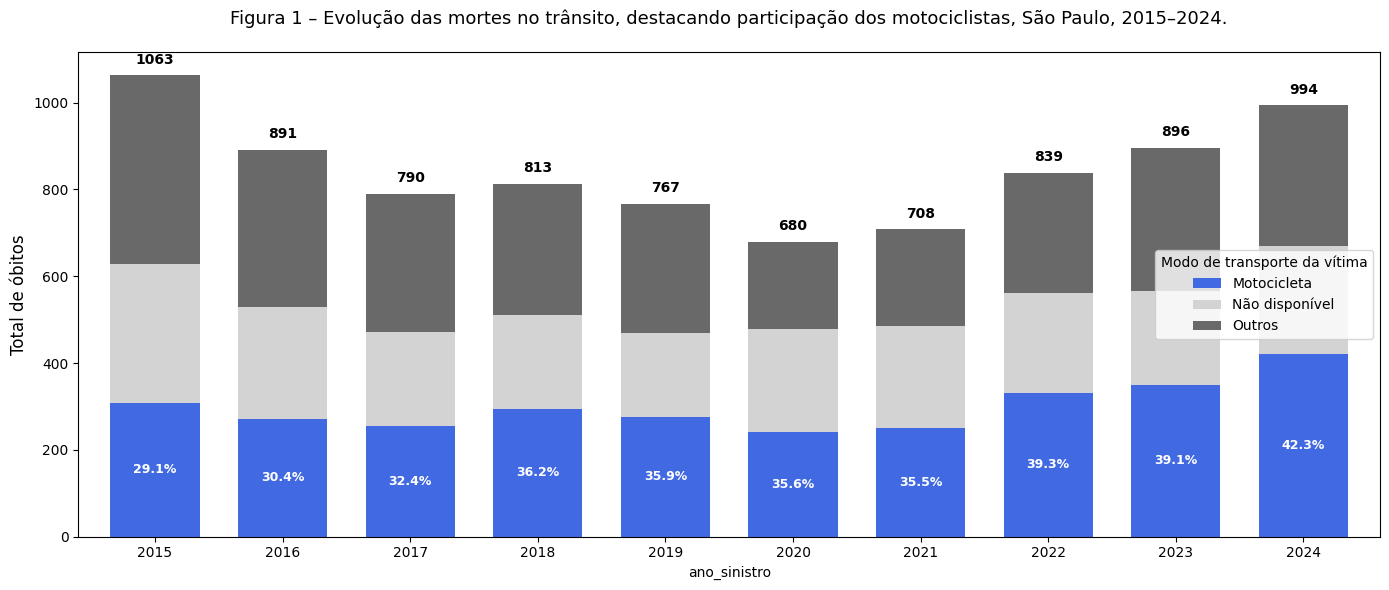

In [59]:
# Agrupar por ano e tipo de transporte
df_grouped = df_sinistros.query("tipo_registro == 'SINISTRO FATAL' and municipio == 'SAO PAULO' and ano_sinistro < 2025 and ano_sinistro > 2014").groupby(['ano_sinistro', 'tipo_de_transporte']).size().reset_index(name='count')

# Pivot to get years as index and transport types as columns
df_pivot = df_grouped.pivot(index='ano_sinistro', columns='tipo_de_transporte', values='count').fillna(0)

# Create stacked bar chart
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(14, 6), 
                   color=['#4169E1', '#D3D3D3', '#696969'],
                   width=0.7)

# Add total values on top of bars
totals = df_pivot.sum(axis=1)
for i, (year, total) in enumerate(totals.items()):
    ax.text(i, total + 20, f'{int(total)}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Add percentages inside blue bars (Motocicleta)
for i, (year, row) in enumerate(df_pivot.iterrows()):
    motorcycle_pct = (row['Motocicleta'] / totals[year]) * 100
    motorcycle_height = row['Motocicleta'] / 2  # Middle of motorcycle bar
    ax.text(i, motorcycle_height, f'{motorcycle_pct:.1f}%', ha='center', va='center', 
            color='white', fontweight='bold', fontsize=9)

ax.set_ylabel('Total de óbitos', fontsize=12)
ax.set_title('Figura 1 – Evolução das mortes no trânsito, destacando participação dos motociclistas, São Paulo, 2015–2024.', 
             fontsize=13, pad=20)
ax.legend(title='Modo de transporte da vítima', loc='center right', frameon=True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

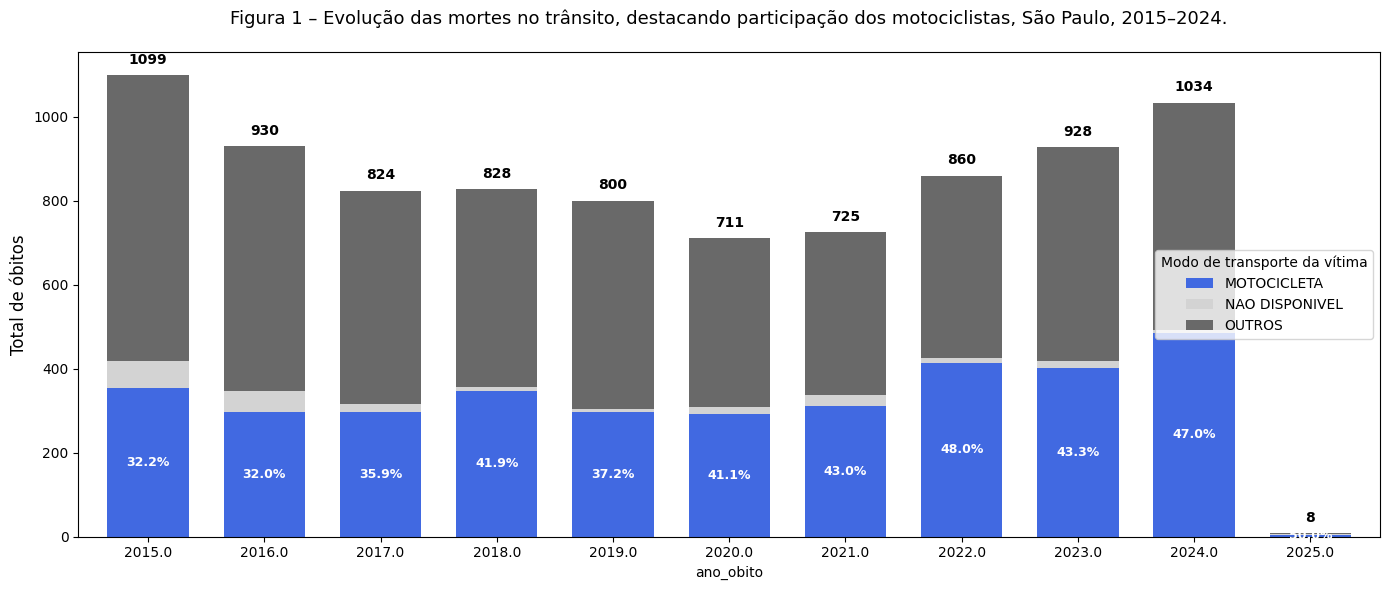

In [80]:
def tipo_transporte(row):
    if row['tipo_veiculo_vitima'] in ['MOTOCICLETA', 'OUTROS', 'NAO DISPONIVEL']:
        return row['tipo_veiculo_vitima']
    else:
        return 'OUTROS'
    
df_merge['tipo_veiculo_vitima2'] = df_merge.apply(tipo_transporte, axis=1)

df_antes = df_merge.query("gravidade_lesao == 'FATAL' and municipio == 'SAO PAULO' and ano_sinistro < 2025 and ano_sinistro > 2014 and tipo_veiculo_vitima2 in ['MOTOCICLETA', 'OUTROS', 'NAO DISPONIVEL']")

# Agrupar por ano e tipo de transporte
df_grouped = df_antes.groupby(['ano_obito', 'tipo_veiculo_vitima2']).size().reset_index(name='count')

# Pivot to get years as index and transport types as columns
df_pivot = df_grouped.pivot(index='ano_obito', columns='tipo_veiculo_vitima2', values='count').fillna(0)

# Create stacked bar chart
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(14, 6), 
                   color=['#4169E1', '#D3D3D3', '#696969'],
                   width=0.7)

# Add total values on top of bars
totals = df_pivot.sum(axis=1)
for i, (year, total) in enumerate(totals.items()):
    ax.text(i, total + 20, f'{int(total)}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Add percentages inside blue bars (Motocicleta)
for i, (year, row) in enumerate(df_pivot.iterrows()):
    motorcycle_pct = (row['MOTOCICLETA'] / totals[year]) * 100
    motorcycle_height = row['MOTOCICLETA'] / 2  # Middle of motorcycle bar
    ax.text(i, motorcycle_height, f'{motorcycle_pct:.1f}%', ha='center', va='center', 
            color='white', fontweight='bold', fontsize=9)

ax.set_ylabel('Total de óbitos', fontsize=12)
ax.set_title('Figura 1 – Evolução das mortes no trânsito, destacando participação dos motociclistas, São Paulo, 2015–2024.', 
             fontsize=13, pad=20)
ax.legend(title='Modo de transporte da vítima', loc='center right', frameon=True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [73]:
df_pivot

tipo_veiculo_vitima,AUTOMOVEL,BICICLETA,CAMINHAO,MOTOCICLETA,Motocicleta,NAO DISPONIVEL,ONIBUS,OUTROS,PEDESTRE,Pedestre
ano_obito,,,,,,,,,,
2015.0,172.0,28.0,17.0,354.0,0.0,64.0,6.0,2.0,456.0,0.0
2016.0,157.0,25.0,7.0,298.0,9.0,48.0,3.0,3.0,372.0,8.0
2017.0,100.0,36.0,3.0,296.0,0.0,20.0,10.0,2.0,357.0,0.0
2018.0,106.0,21.0,2.0,347.0,0.0,9.0,3.0,1.0,339.0,0.0
2019.0,100.0,34.0,14.0,298.0,0.0,7.0,5.0,3.0,339.0,0.0
2020.0,107.0,33.0,6.0,292.0,0.0,17.0,4.0,2.0,250.0,0.0
2021.0,108.0,44.0,12.0,312.0,0.0,26.0,0.0,0.0,223.0,0.0
2022.0,96.0,30.0,4.0,413.0,0.0,13.0,3.0,0.0,301.0,0.0
2023.0,112.0,35.0,6.0,402.0,0.0,16.0,3.0,2.0,352.0,0.0
